# **Dynamic Pricing Modelling**
A ride-sharing company wants to implement a dynamic pricing strategy to optimize fares based on real-time market conditions. The company only uses ride duration to decide ride fares currently. The company aims to leverage data-driven techniques to analyze historical data and develop a predictive model that can dynamically adjust prices in response to changing factors.

The dataset containing historical ride data has been provided. It includes features such as the number of riders, number of drivers, location category, customer loyalty status, number of past rides, average ratings, time of booking, vehicle type, expected ride duration, and historical cost of the rides.

Your goal is to build a dynamic pricing model that incorporates the provided features to predict optimal fares for rides in real-time. The model must consider factors such as demand patterns and supply availability.



# Importing Data, Libraries and inital checks

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing the data
main=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FINAL PROJECT/dynamic_pricing.csv")
backup=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FINAL PROJECT/dynamic_pricing.csv")

In [ ]:
df=main
print(df.head(5))
print("...................................................................................................")
print(df.tail(5))
print("...................................................................................................")
print(df.info())

   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Afternoon      Premium                      76  

In [ ]:
# checking the shape of the dataset
df.shape

#the dataset has 1000 rows and 10 columns

(1000, 10)

# Data Cleaning and Pre Processing

In [ ]:
df.head(5)

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [ ]:
df.columns

Index(['Number_of_Riders', 'Number_of_Drivers', 'Location_Category',
       'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings',
       'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration',
       'Historical_Cost_of_Ride'],
      dtype='object')

In [ ]:
#Dividing Categoricals and Quants
cats=['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']
quants=['Number_of_Riders','Number_of_Drivers', 'Number_of_Past_Rides', 'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']

In [ ]:
#getting summary statistics on quantitative variables
df_quants=df.loc[:,quants]
df_cats=df.loc[:,cats]
df_quants.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [ ]:
#getting summary statistics on categorical variables
df_cats.describe()

,Location_Category,Customer_Loyalty_Status,Time_of_Booking,Vehicle_Type
count,1000,1000,1000,1000
unique,3,3,4,2
top,Urban,Silver,Night,Premium
freq,346,367,276,522


In [ ]:
#checking unique datapoints in categorical variables
for i in cats:
  print(df[i].value_counts())

Location_Category
Urban       346
Rural       332
Suburban    322
Name: count, dtype: int64
Customer_Loyalty_Status
Silver     367
Regular    320
Gold       313
Name: count, dtype: int64
Time_of_Booking
Night        276
Afternoon    247
Morning      246
Evening      231
Name: count, dtype: int64
Vehicle_Type
Premium    522
Economy    478
Name: count, dtype: int64


In [ ]:
#checking integers available in integer quantitative variables
for i in ['Number_of_Riders','Number_of_Drivers', 'Number_of_Past_Rides', 'Expected_Ride_Duration']:
  print(i,df[i].unique())

#all are in integer form

Number_of_Riders [ 90  58  42  89  78  59  93  62  79  86  60  24  36  63  39  38  46  33
  31  96  22  74  48  56  72  97  57  25  75  35  68  28  73  29  94  54
  67  23  70  20  95  43  32  47  37  53  40  76  41  83  44  91  45  52
  81  77  27  92  66  61  71  49  55  34  51  88  26  80  64  84 100  21
  65  82  85  69  50  87  99  30  98]
Number_of_Drivers [45 39 31 28 22 35 43 14  6 17 38  8 24 13 12  7 11 16 19 33 75 56  9 32
 15 18 10 81 29 84 55 20 25 64 23 40 26 73 37 34 69 21 44 30 42  5 47 49
 51 48 36 46 80 59 41 50 57 71 62 27 63 67 60 54 53 66 52 72 76 65 58 74
 61 70 87 77 89 85 82]
Number_of_Past_Rides [ 13  72   0  67  74  83  44  71  21  99  15  50  88  30  35  49  24   6
  79  10  36  66  76  39  54  94  73  34  97  52  65   2  14  55  89  25
  60  27  16  70  18  40  33  91  41  77  96  80  61   8  86  28  82  87
  23  31  84  20  57  92  46  26  19   3  11  51  90  58  63  68  32  47
  56 100  59  17  12  22  48  64  78  75  69  62  42  98  37  95  53   7
   5   

In [ ]:
#Checking for Duplicates of data set
df.duplicated().sum()

#no duplicates in the dataset

0

In [ ]:
#checking Null values
df.isnull().sum()


#no missing values in the dataset

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

## Feature Engineering

In [ ]:
# Calculate demand_multiplier based on percentile for high and low demand
high_demand_percentile = 75
low_demand_percentile = 25

df['demand_multiplier'] = np.where(df['Number_of_Riders'] > np.percentile(df['Number_of_Riders'], high_demand_percentile),
                                     df['Number_of_Riders'] / np.percentile(df['Number_of_Riders'], high_demand_percentile),
                                     df['Number_of_Riders'] / np.percentile(df['Number_of_Riders'], low_demand_percentile))

# Calculate supply_multiplier based on percentile for high and low supply
high_supply_percentile = 75
low_supply_percentile = 25

df['supply_multiplier'] = np.where(df['Number_of_Drivers'] > np.percentile(df['Number_of_Drivers'], low_supply_percentile),
                                     np.percentile(df['Number_of_Drivers'], high_supply_percentile) / df['Number_of_Drivers'],
                                     np.percentile(df['Number_of_Drivers'], low_supply_percentile) / df['Number_of_Drivers'])

# Define price adjustment factors for high and low demand/supply
demand_threshold_high = 1.2  # Higher demand threshold
demand_threshold_low = 0.8  # Lower demand threshold
supply_threshold_high = 0.8  # Higher supply threshold
supply_threshold_low = 1.2  # Lower supply threshold

# Calculate adjusted_ride_cost for dynamic pricing
df['adjusted_ride_cost'] = df['Historical_Cost_of_Ride'] * (
    np.maximum(df['demand_multiplier'], demand_threshold_low) *
    np.maximum(df['supply_multiplier'], supply_threshold_high)
)

In [ ]:
df.head(5)

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,demand_multiplier,supply_multiplier,adjusted_ride_cost
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,1.111111,0.844444,266.710528
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,1.450000,0.974359,245.653817
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,1.050000,1.225806,424.478684
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,1.098765,1.357143,701.155452
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,1.950000,1.727273,1952.472427


In [ ]:
#dropping unwanted columns
df=df.drop(['demand_multiplier','supply_multiplier'],axis=1)

In [ ]:
#profit modelling
df['profit_percentage'] = ((df['adjusted_ride_cost'] - df['Historical_Cost_of_Ride']) / df['Historical_Cost_of_Ride']) * 100


## Descriptive Analytics before feature engineering

In [ ]:
px.scatter(x=df['adjusted_ride_cost'],
           y=df['Historical_Cost_of_Ride'],
           title="Historical_Cost_of_Ride vs. adjusted_ride_cost",
           trendline='ols')

In [ ]:
px.scatter(x=df['Expected_Ride_Duration'],
           y=df['Historical_Cost_of_Ride'],
           title="Expected Time vs. Estimated Cost",
           trendline='ols')

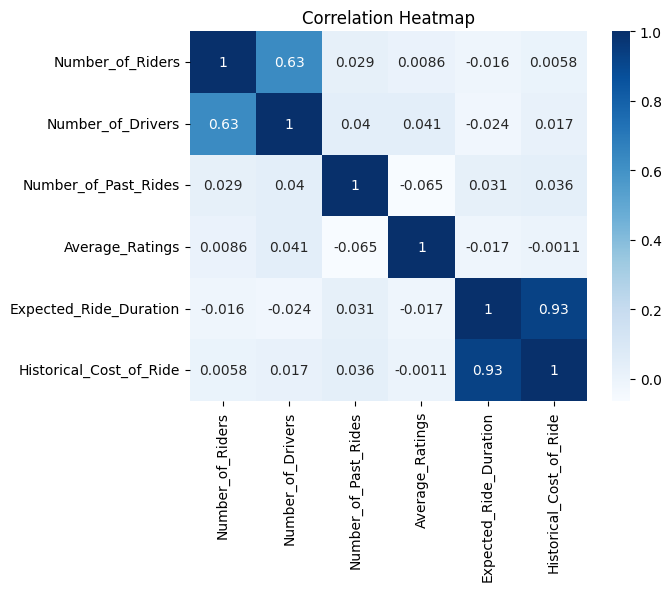

In [ ]:
sns.heatmap(df.loc[:,quants].corr(),cmap="Blues",annot=True)
plt.title("Correlation Heatmap")
plt.show()

## Outliers Treatements


In [ ]:
#backup dataset
backup1=df

In [ ]:
#dropping the historic cost coloumn, since we got adjusted cost by using historic cost
#dropping unwanted columns
df=df.drop(['Historical_Cost_of_Ride'],axis=1)

In [ ]:
df.head(5)

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,adjusted_ride_cost,profit_percentage
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,266.710528,-6.172840
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,245.653817,41.282051
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,424.478684,28.709677
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,701.155452,49.118166
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,1952.472427,236.818182


In [ ]:
#defining new quants
quants=['Number_of_Riders','Number_of_Drivers', 'Number_of_Past_Rides', 'Average_Ratings', 'Expected_Ride_Duration', 'adjusted_ride_cost','profit_percentage']

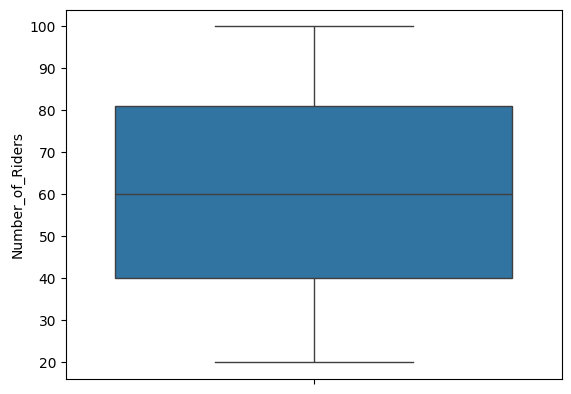

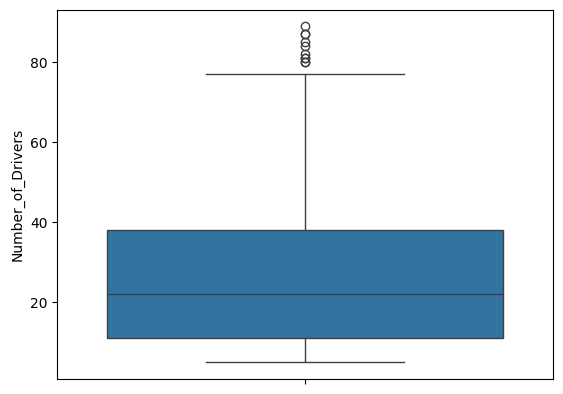

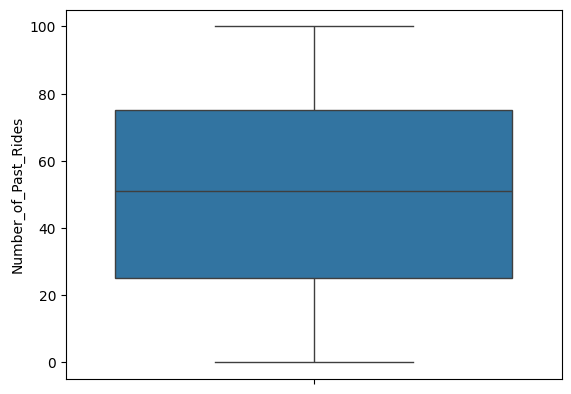

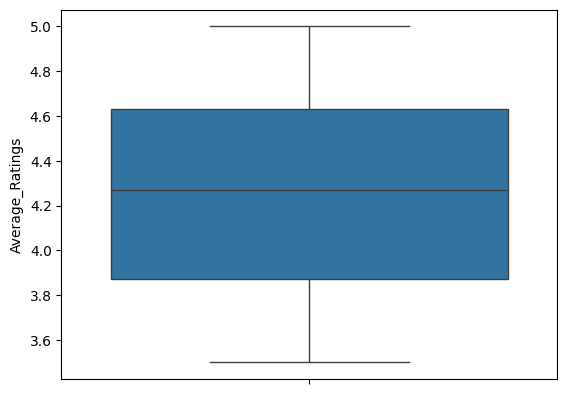

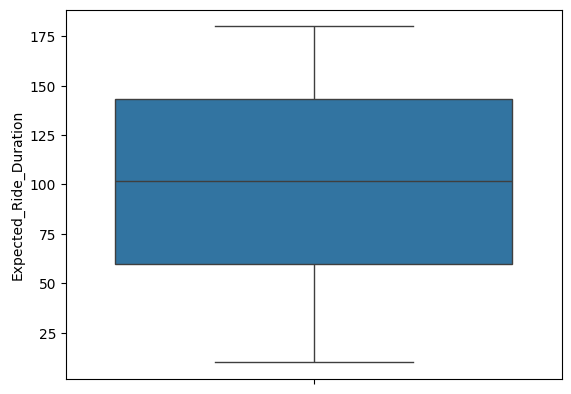

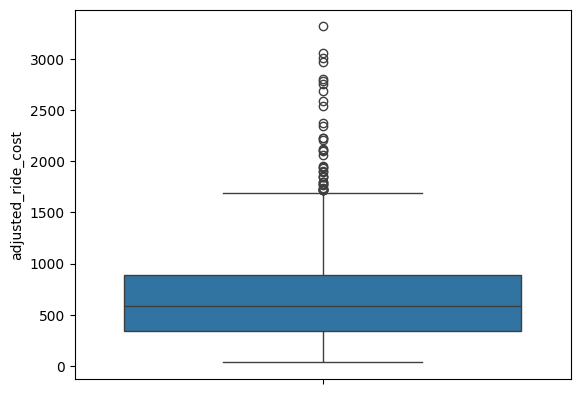

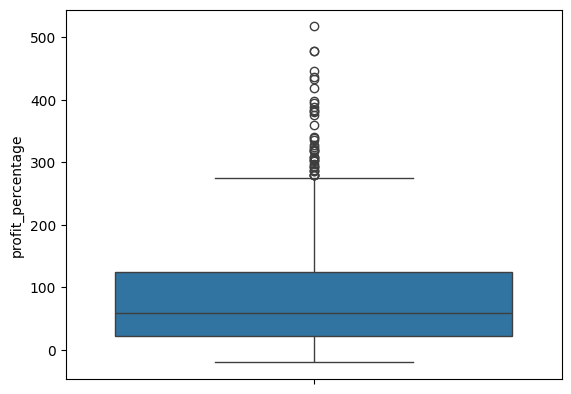

In [ ]:
#plotting individual box plot on categorical variables to initial checkinh of outliers
for i in quants:
  sns.boxplot(df[i])
  plt.show()

In [ ]:
#using transformation
target=df['adjusted_ride_cost']
target_sqrt=np.sqrt(target)
tager_ln=np.log(target)

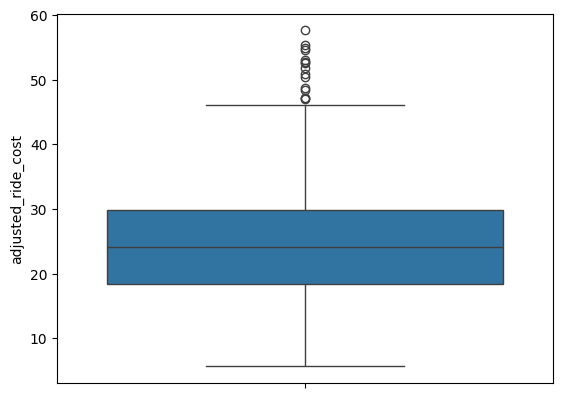

In [ ]:
sns.boxplot(target_sqrt)
plt.show()

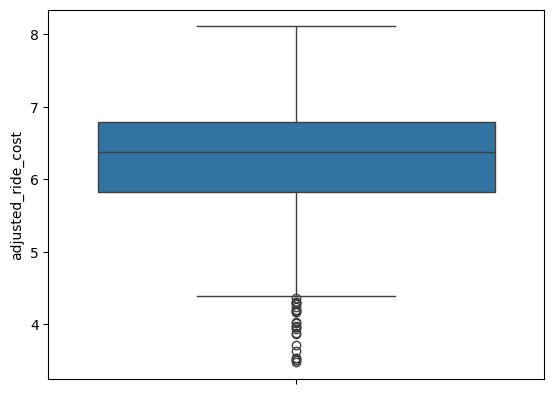

In [ ]:
sns.boxplot(tager_ln)
plt.show()

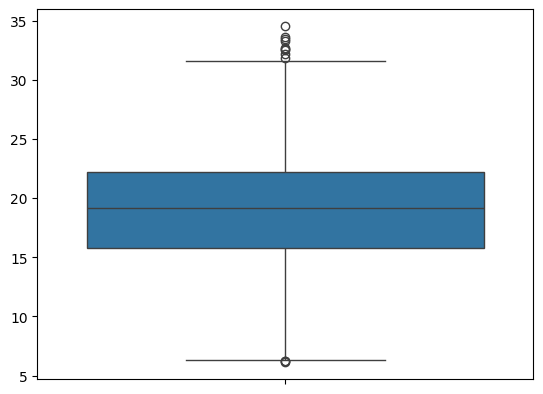

In [ ]:
from scipy import stats
target_bx=stats.boxcox(target)
sns.boxplot(target_bx[0])
plt.show()

(array([[  0.,   7.,  44., 104., 209., 281., 218.,  98.,  29.,  10.],
        [  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([ 0.2997945 ,  3.72825624,  7.15671799, 10.58517974, 14.01364149,
        17.44210323, 20.87056498, 24.29902673, 27.72748848, 31.15595022,
        34.58441197]),
 <a list of 2 BarContainer objects>)

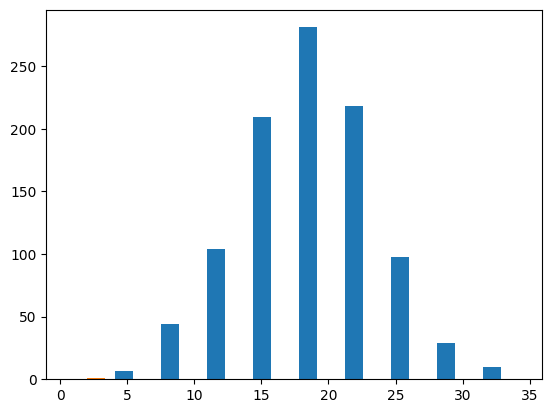

In [ ]:
plt.hist(target_bx)

## Outlier Detection

In [ ]:
#Using Mahalanobis Distance
def mahalanobis(x=None, data=None, cov=None):

    x_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

In [ ]:
df11 = pd.DataFrame(df,columns=quants)
df_quants=pd.DataFrame(df,columns=quants)

In [ ]:
  #Checking for positive symetry of data
  covariance_matrix = np.cov(df11, rowvar=False)
  inv_covariance_matrix = np.linalg.inv(covariance_matrix)

In [ ]:
def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False

is_pos_def(inv_covariance_matrix)

True

In [ ]:
# Creating a new column in the dataframe that holds
# the Mahalanobis distance for each row

df11['mahalanobis'] = mahalanobis(x=df11, data=df11[quants])


# Display the dataframe

print(df11)

from scipy.stats import chi2

#calculate p-value for each mahalanobis distance
df11['p'] = 1 - chi2.cdf(df11['mahalanobis'], 9)
print(df11)

     Number_of_Riders  Number_of_Drivers  Number_of_Past_Rides  \
0                  90                 45                    13   
1                  58                 39                    72   
2                  42                 31                     0   
3                  89                 28                    67   
4                  78                 22                    74   
..                ...                ...                   ...   
995                33                 23                    24   
996                84                 29                    92   
997                44                  6                    80   
998                53                 27                    78   
999                78                 63                    14   

     Average_Ratings  Expected_Ride_Duration  adjusted_ride_cost  \
0               4.47                      90          266.710528   
1               4.06                      43          245.653817   
2  

In [ ]:
#Typically a p-value that is less than .01
#identify multivariate outliers

idx=df11.index[df11['p'] <= 0.001].tolist()
idx
df22=df11.drop(index=idx,axis='index')
df22

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,adjusted_ride_cost,profit_percentage,mahalanobis,p


In [ ]:
from scipy import stats
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_norm=scaler.fit_transform(df_quants)
df_norm=pd.DataFrame(df_norm)

z=np.abs(stats.zscore(df_norm))
print(np.where(z>3))

(array([  8,   8,  14,  39,  51, 113, 147, 147, 159, 159, 191, 253, 274,
       274, 275, 290, 369, 442, 502, 600, 623, 663, 665, 665, 672, 722,
       821, 823, 830, 833, 833, 876, 889, 953]), array([5, 6, 6, 5, 6, 5, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 1,
       5, 6, 5, 6, 1, 1, 5, 5, 6, 1, 5, 6]))


In [ ]:
f=[  8,   8,  14,  39,  51, 113, 147, 147, 159, 159, 191, 253, 274,
       274, 275, 290, 369, 442, 502, 600, 623, 663, 665, 665, 672, 722,
       821, 823, 830, 833, 833, 876, 889, 953]

## train test splitting

In [ ]:
#separating features and target for use in modelling
X = df.drop(['adjusted_ride_cost'], axis=1)

y = df['adjusted_ride_cost']

In [ ]:
# Splitting dataset to train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [ ]:
#creating train dataset
df_train=pd.concat([X_train, y_train], axis=1)

In [ ]:
df_train
# checking the shape of the dataset
df_train.shape

#the train dataset has 800 rows and 10 columns

(800, 11)

In [ ]:
df_train

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,profit_percentage,adjusted_ride_cost
687,51,25,Rural,Regular,21,4.43,Evening,Premium,38,93.800000,388.100506
500,21,9,Suburban,Gold,13,4.01,Evening,Economy,127,-2.222222,421.668229
332,100,66,Suburban,Gold,27,3.53,Evening,Premium,106,-1.234568,407.166031
979,79,29,Rural,Silver,29,4.22,Night,Economy,99,158.793103,788.656916
817,27,8,Rural,Gold,48,4.18,Afternoon,Economy,167,10.000000,544.741756
...,...,...,...,...,...,...,...,...,...,...,...
835,35,21,Suburban,Silver,13,4.14,Morning,Premium,36,58.333333,306.600457
192,65,10,Urban,Regular,77,4.36,Afternoon,Economy,170,78.750000,769.314060
629,57,40,Urban,Regular,78,3.62,Afternoon,Economy,171,35.375000,1035.070943
559,75,56,Urban,Regular,66,3.69,Evening,Premium,22,50.000000,186.735901


# Descriptive Analysis

## Univariate plots

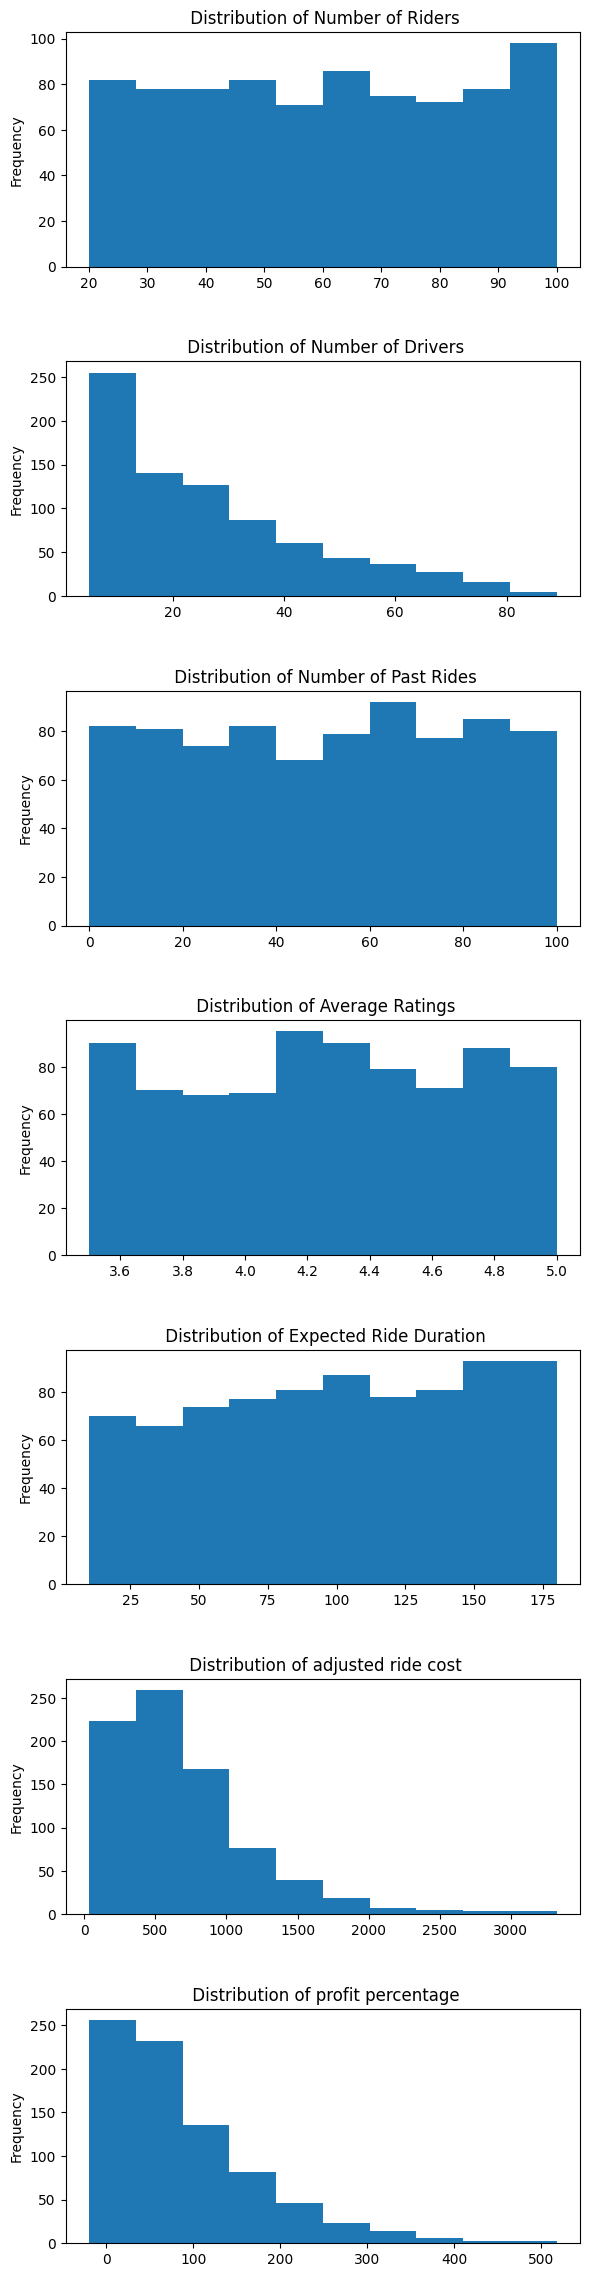

In [ ]:

# Histograms of numerical variables

#function to remove _ from titles

def title(x):
  return x.replace('_', ' ')
fig,axes = plt.subplots(nrows=7, ncols=1,figsize=(6,15))

for i, ax in enumerate(axes.ravel()):
  (n, bins, patches) = ax.hist(df_train[quants[i]], bins= 10)
  ax.set_title(f" Distribution of {title(quants[i])}")
  ax.set_ylabel("Frequency")

  #creating a dataframe with the values of bin edges
  #df_hist = pd.DataFrame(data=n, columns=['bin_values'])
  #df_hist['left_bin_edge'] = bins[0:-1]
  #df_hist
 # last = {'bin_values': 0,'left_bin_edge': bins[-1] }
 # df_hist = df_hist.append(last, ignore_index=True)
  #looping through dataframe above to identify bins with most frequency and the respective bin edges

fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()


In [ ]:
fig = px.histogram(df_train, x="adjusted_ride_cost", nbins=30,title="Distribution of Adjusted ride cost",width=600, height=500)
fig.update_traces(marker_line_width=1,marker_line_color="white")

# Show the histogram
fig.show()

In [ ]:
df_train.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,profit_percentage,adjusted_ride_cost
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,60.107500,26.717500,50.008750,4.250538,99.113750,85.737946,680.791301
std,23.530417,18.789665,29.272552,0.433474,49.053605,89.223872,487.057421
min,20.000000,5.000000,0.000000,3.500000,10.000000,-20.000000,33.473787
25%,40.000000,11.000000,24.000000,3.877500,57.500000,23.967803,338.060628
50%,60.000000,22.000000,52.000000,4.260000,102.000000,59.753086,582.770136
75%,80.000000,38.000000,74.250000,4.622500,141.250000,133.774038,881.608258
max,100.000000,89.000000,100.000000,5.000000,180.000000,517.500000,3321.900511


Comments:
The number of the riders and the number of past riders follow a relatively uniform distribution

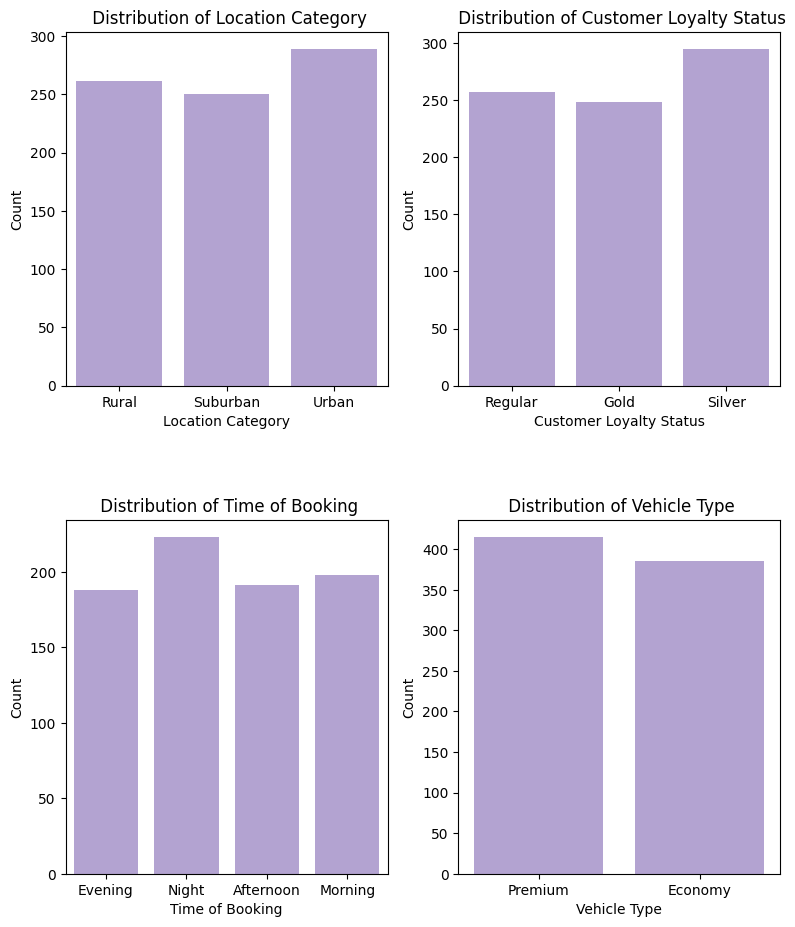

In [ ]:
#countplots for categorical variables

fig,axes = plt.subplots(nrows=2, ncols=2,figsize=(8,6))

for i, ax in enumerate(axes.ravel()):
  if i < 5:
    sns.countplot(x=df_train[cats[i]], ax=ax, color="#B19CD8")
    ax.set_title(f" Distribution of {title(cats[i])}")
    ax.set_xlabel(title(cats[i]))
    ax.set_ylabel("Count")


fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()

Categories of each Categorical variabes are approximately balanced

## Bivariate analysis for adjusted cost

In [ ]:
#dropping profit percentage colomn
df_train_backup=df_train
df_train = df_train.drop(['profit_percentage'], axis=1)

In [ ]:
df_train.head(5)

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,adjusted_ride_cost
687,51,25,Rural,Regular,21,4.43,Evening,Premium,38,388.100506
500,21,9,Suburban,Gold,13,4.01,Evening,Economy,127,421.668229
332,100,66,Suburban,Gold,27,3.53,Evening,Premium,106,407.166031
979,79,29,Rural,Silver,29,4.22,Night,Economy,99,788.656916
817,27,8,Rural,Gold,48,4.18,Afternoon,Economy,167,544.741756


As the first section graphical chacking the bivariate relationships

In [ ]:
#Expected ride duration vs adjusted cost
fig = px.scatter(df_train, x='Expected_Ride_Duration',
                 y='adjusted_ride_cost',
                 title='Expected Ride Duration vs. adjusted_ride_cost',
                 trendline='ols',width=600, height=500)
fig.show()

As expected expected ride duration increase with adjusted cost

In [ ]:
fig = px.scatter(df_train, x='Number_of_Drivers',
                 y='adjusted_ride_cost',
                 title='Number_of_Riders vs. adjusted_ride_cost',
                 trendline="lowess",width=600, height=500)
fig.show()

We can see the price following a demand curve, as the demand goes down so does the number of drivers and the price

Somewhat non linear pattern is shown

In [ ]:
#Average_Ratings vs adjusted cost
fig = px.scatter(df_train, x='Average_Ratings',
                 y='adjusted_ride_cost',
                 title='Average_Ratings vs. adjusted_ride_cost',
                 trendline='ols',width=600, height=500)
fig.show()

No relationship between average_Ratings vs adjusted cost

In [ ]:
#Number_of_Past_Rides vs adjusted cost
fig = px.scatter(df_train, x='Number_of_Past_Rides',
                 y='adjusted_ride_cost',
                 title='Number_of_Past_Rides vs. adjusted_ride_cost',
                 trendline='ols',width=600, height=500)
fig.show()

No relationship between Number_of_Past_Rides vs adjusted cost

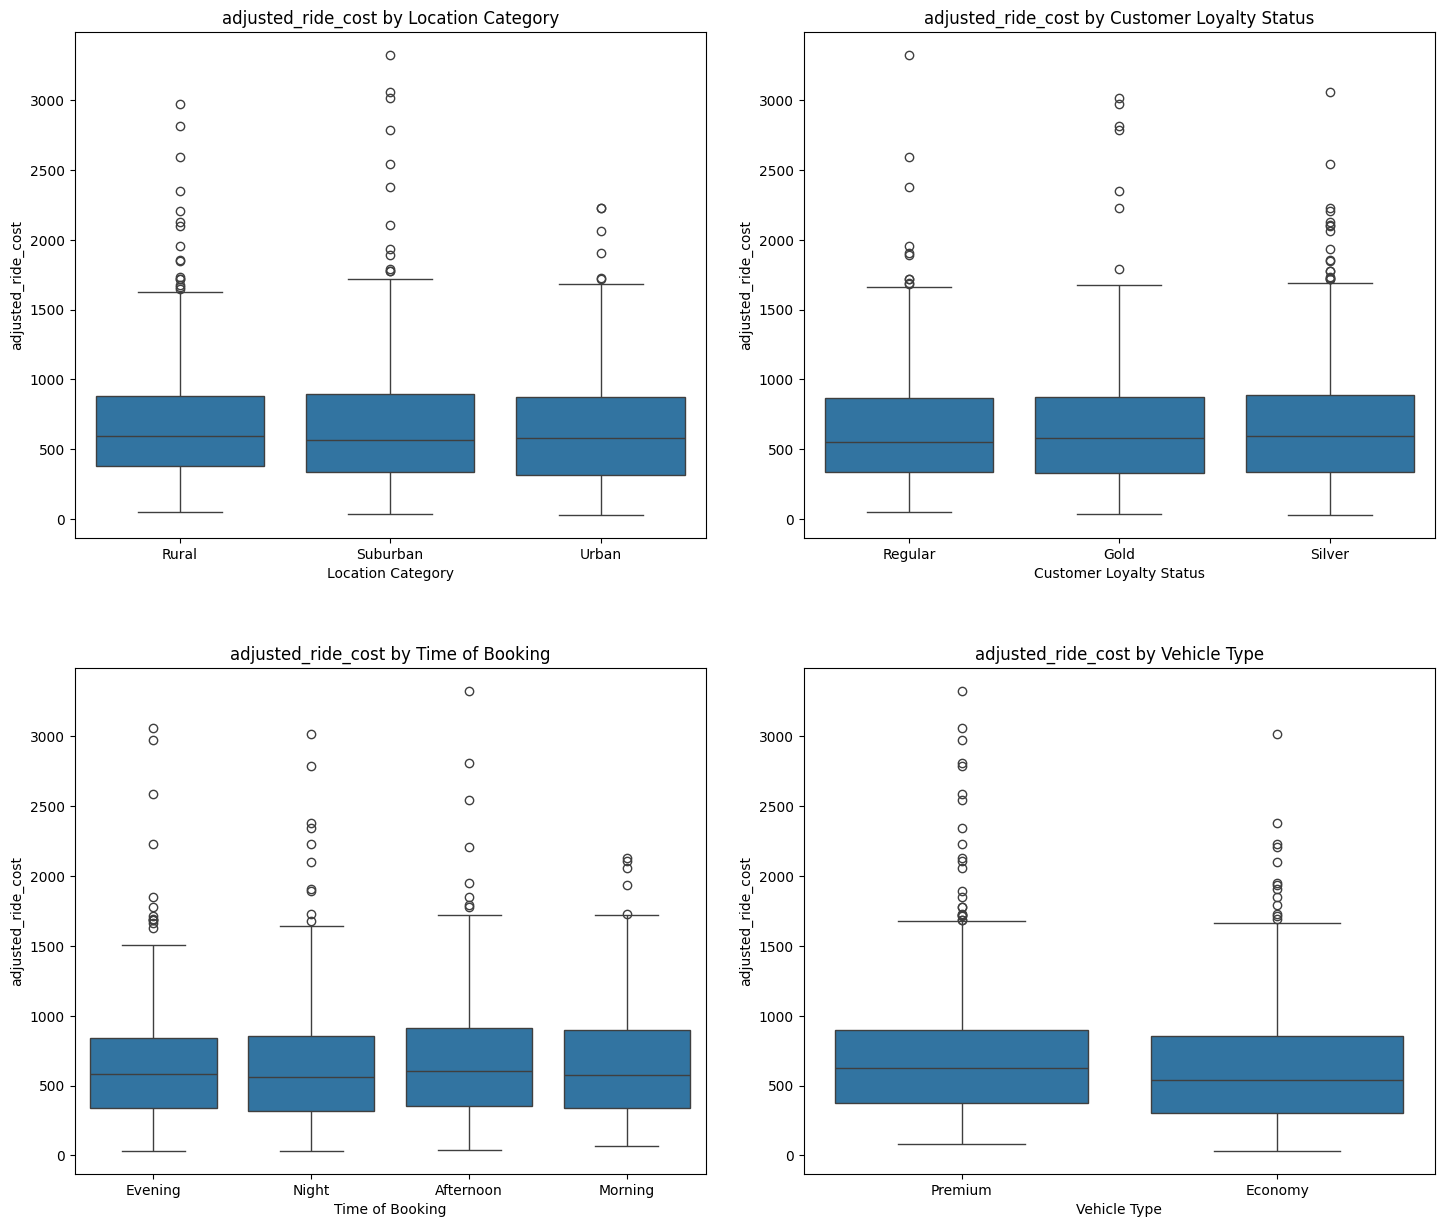

In [ ]:
#checking categorical bivariate plots

fig,axes = plt.subplots(nrows=2, ncols=2,figsize=(12,8))

for i, ax in enumerate(axes.ravel()):
  # if i <= 2:
    sns.boxplot(data=df_train, x=cats[i], y='adjusted_ride_cost', ax=ax)
    ax.set_title(f"adjusted_ride_cost by {title(cats[i])}")
    ax.set_xlabel(title(cats[i]))
    ax.set_ylabel("adjusted_ride_cost")

fig.tight_layout()
plt.subplots_adjust(top=1.5,right=1.2)
plt.show()


Mean levels for neraly all of the categoricals are distributed near evenly with a few outliers.

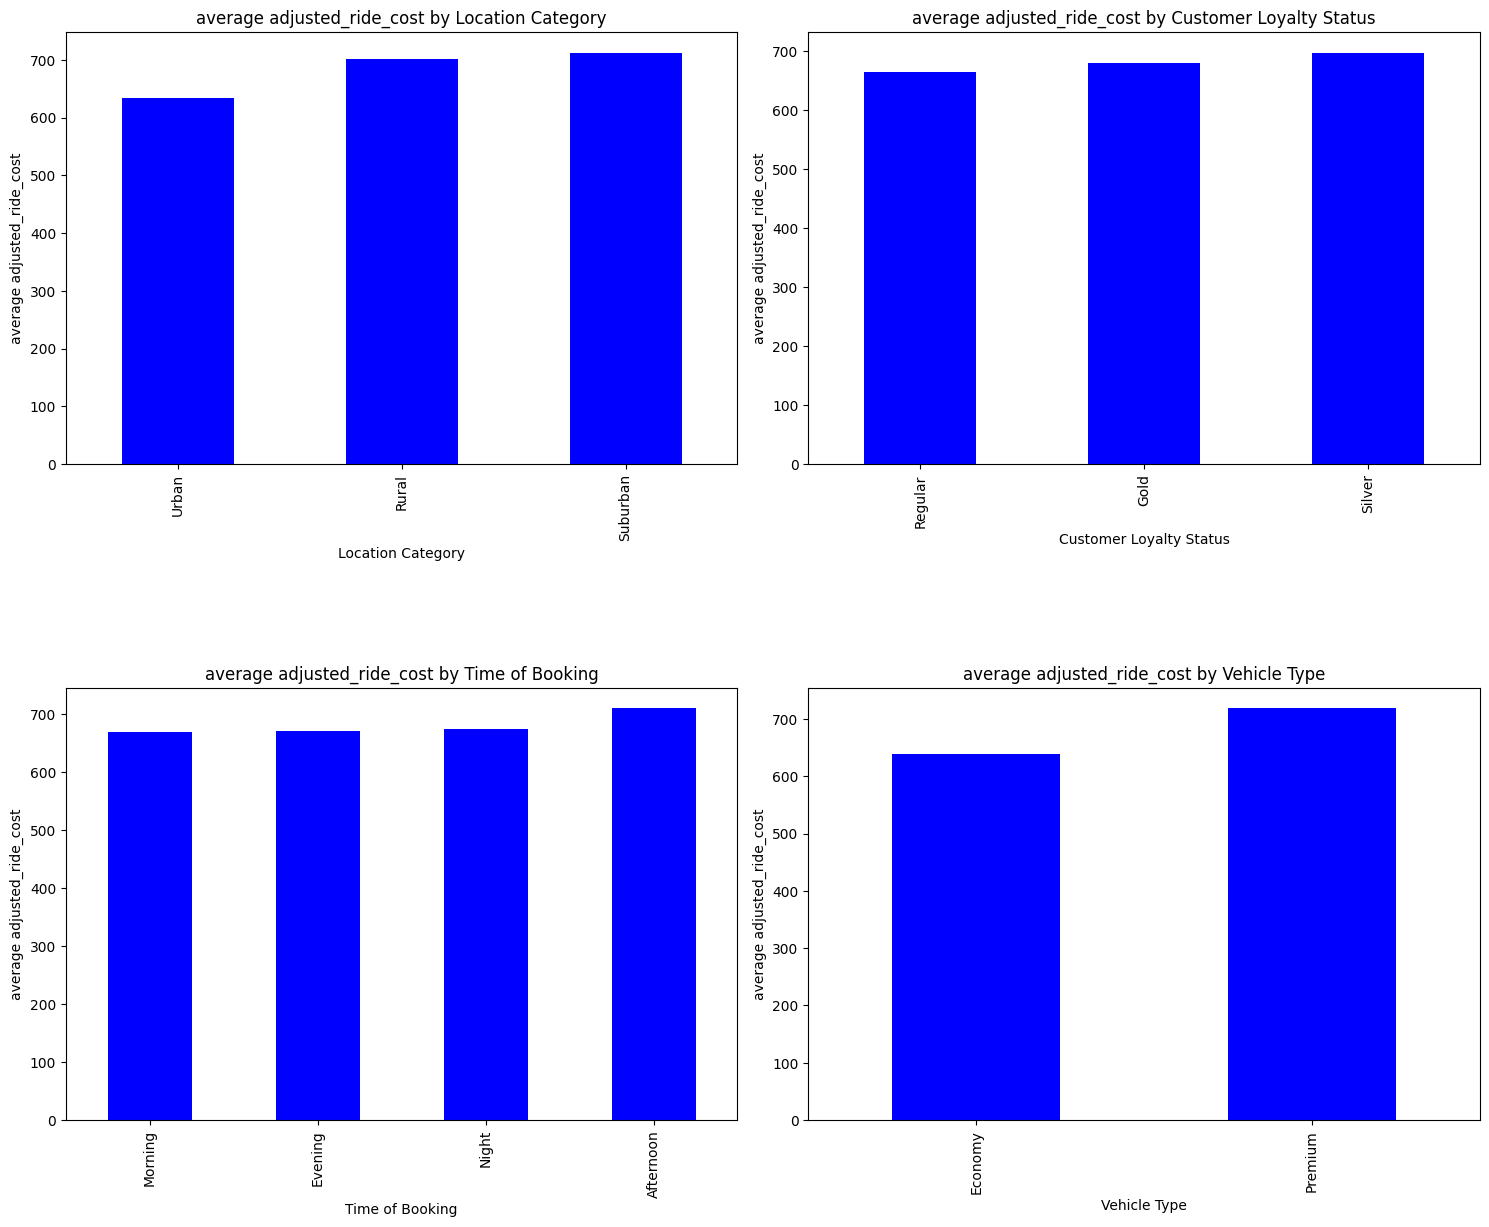

In [ ]:
#average ajusted cost for each ricategorical variables

fig,axes = plt.subplots(nrows=2, ncols=2,figsize=(15,8))

for i, ax in enumerate(axes.ravel()):

    df_train.groupby([cats[i]])['adjusted_ride_cost'].mean().nsmallest(df_train[cats[i]].nunique()).plot.bar(ax=ax, color='blue')

    ax.set_title(f"average adjusted_ride_cost by {title(cats[i])}")
    ax.set_xlabel(title(cats[i]))
    ax.set_ylabel("average adjusted_ride_cost")

fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()

Observations:

The mean adjusted ride cost is highest:
* vehical type is premium (considerable)
* time of booking is afternoon(considerable)

The mean adjusted ride cost is lowest:
* Location category is urban (considerable)

Customer loyalty status much no effect



**From here trivariate analysis**

Most Important features EDA is vehical type and ride duraion, least trivariate effect of that for adjusted ride cost

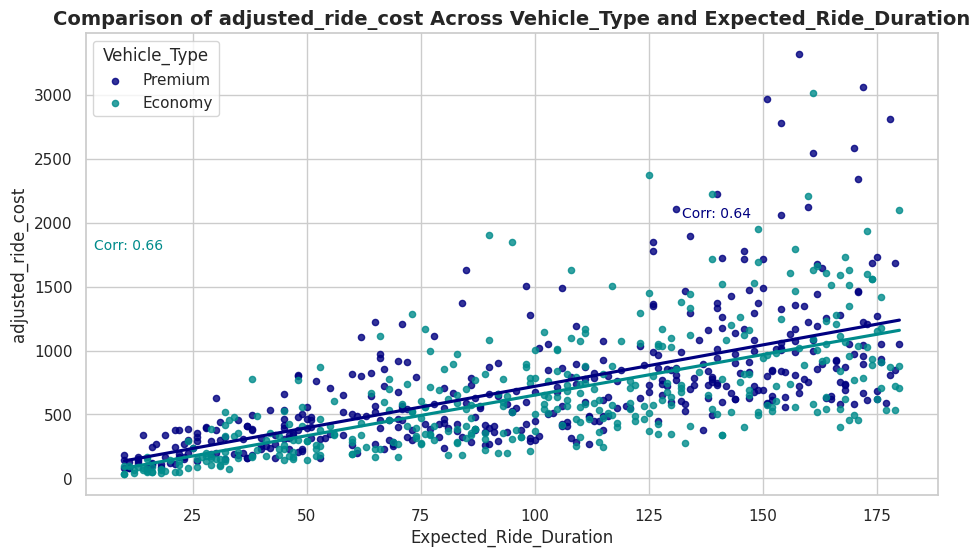

In [ ]:
# @title
sns.set(style='whitegrid')

plt.figure(figsize=(11, 6))

# Separate data for each department
df_sew = df_train[df_train['Vehicle_Type'] == 'Premium']
df_fin = df_train[df_train['Vehicle_Type'] == 'Economy']

# Plot scatter plots with regression lines for each department
sns.regplot(x='Expected_Ride_Duration', y='adjusted_ride_cost', data=df_sew, color='navy', label='Premium', scatter_kws={"s": 20}, ci=None)
sns.regplot(x='Expected_Ride_Duration', y='adjusted_ride_cost', data=df_fin, color='darkcyan', label='Economy', scatter_kws={"s": 20}, ci=None)

# Annotate correlation coefficient for Sewing
cor_sew = df_sew['Expected_Ride_Duration'].corr(df_sew['adjusted_ride_cost'])
plt.annotate(f'Corr: {cor_sew:.2f}', xy=(0.7, 0.6), xycoords='axes fraction', fontsize=10, color='navy')

# Annotate correlation coefficient for Finishing
cor_fin = df_fin['Expected_Ride_Duration'].corr(df_fin['adjusted_ride_cost'])
plt.annotate(f'Corr: {cor_fin:.2f}', xy=(0.01, 0.53), xycoords='axes fraction', fontsize=10, color='darkcyan')

plt.legend(title='Vehicle_Type')

plt.xlabel('Expected_Ride_Duration', fontsize=12)
plt.ylabel('adjusted_ride_cost', fontsize=12)
plt.title('Comparison of adjusted_ride_cost Across Vehicle_Type and Expected_Ride_Duration', fontsize=14, fontweight='bold');

No much variation two type of vehicals

**Next we get the numerrical relationship between response and predictors**

In [ ]:
cats

['Location_Category',
 'Customer_Loyalty_Status',
 'Time_of_Booking',
 'Vehicle_Type']

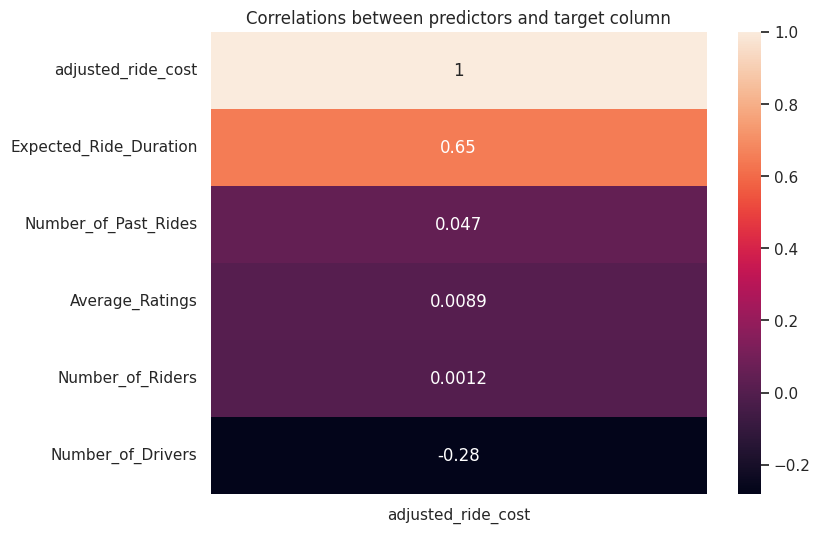

In [ ]:
#nemerical predictors and responses
df_quants=df_train.drop(cats,axis=1)
#highlighting correlations specifically with target
corr = df_quants.corr()
target_col=corr[['adjusted_ride_cost']].sort_values(by='adjusted_ride_cost', ascending=False)

plt.figure(figsize=(8,6))

sns.heatmap(target_col,annot=True)
plt.title("Correlations between predictors and target column")
plt.show()

we can see higher positive correlation with expected ride duration, and some what negetive correlation beteen number of drivers

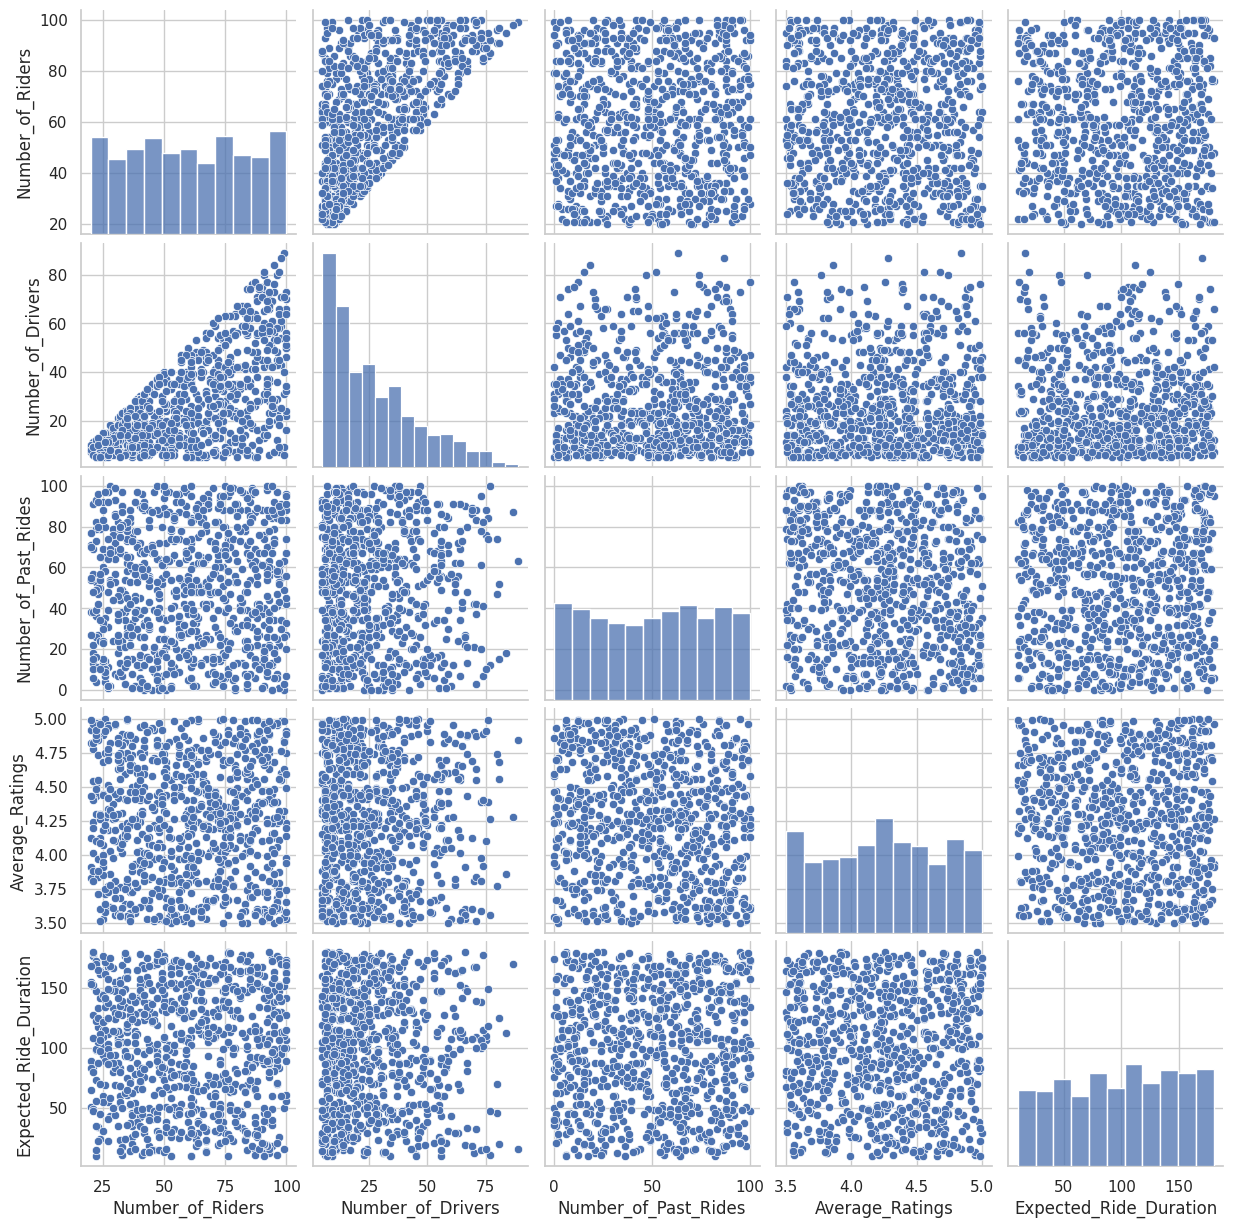

In [ ]:
#checking multicollinearity with quantitative variabels
df_quants1=df_quants.drop(['adjusted_ride_cost'],axis=1)
corr = df_quants1.corr()
sns.pairplot(df_quants1)

<Axes: >

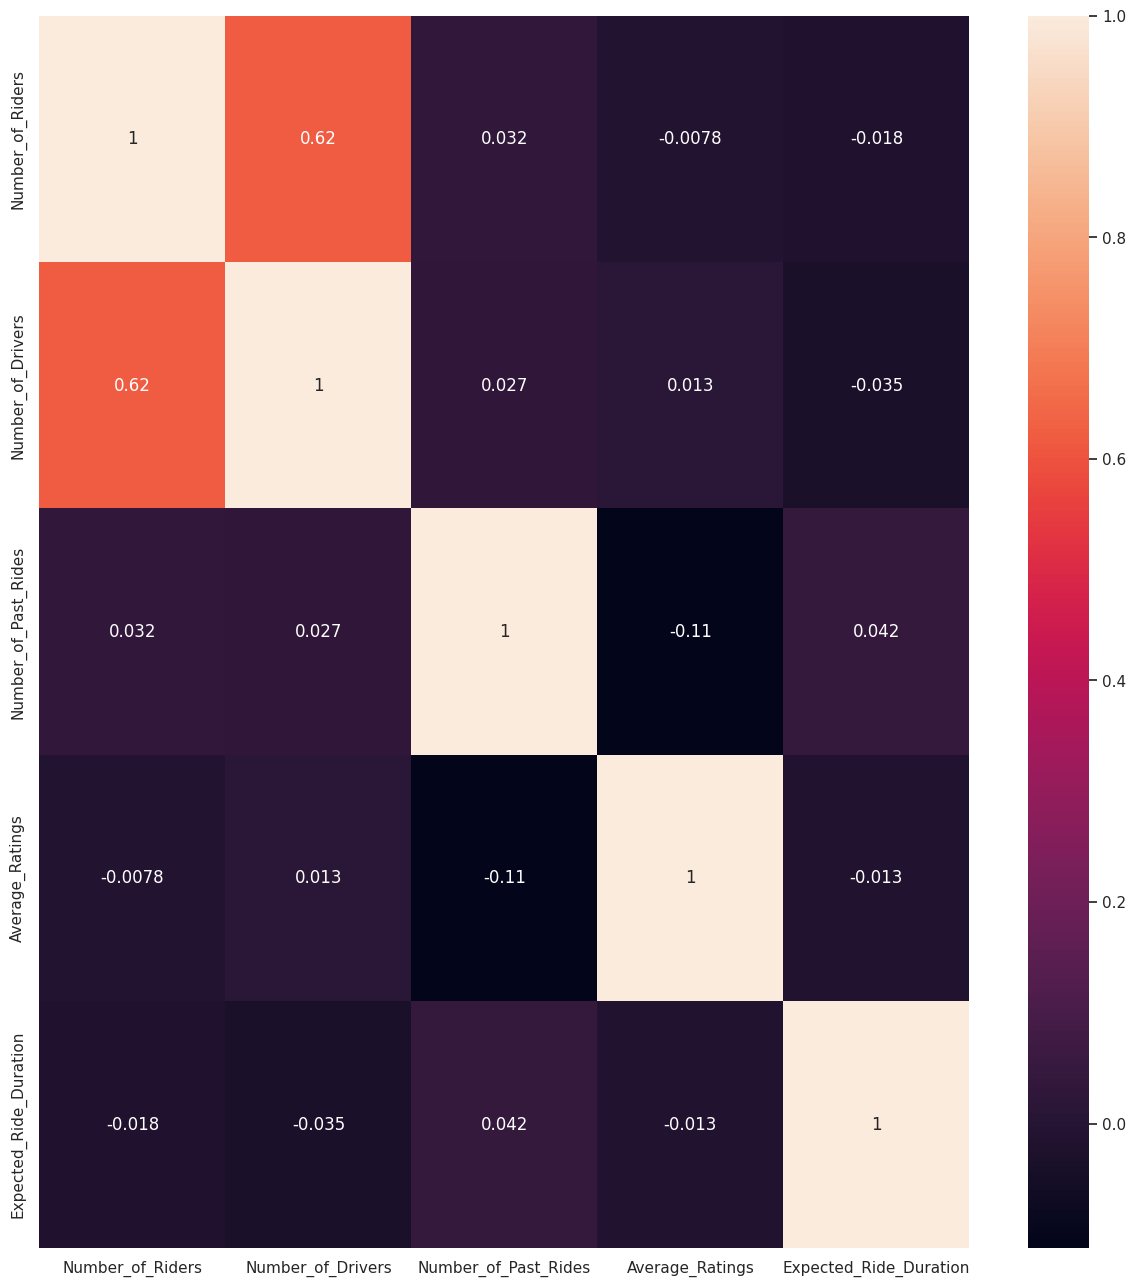

In [ ]:
f, ax = plt.subplots(figsize=(15, 16))
sns.heatmap(corr, annot=True)

Higher corelation between number of riders and number of drivers. Can be explained, demand increases we have to increase the supply
Relationship between profit percetage and riders and drivers. As the number of drivers increase maybe because the price reduces due to economies of scale the profit percentage goes down. But as the number of riders increase the revenue will also increase resulting in increases profits

In [ ]:
df_cats=df_train.drop(quants[0:5],axis=1)
df_cats.head(5)

,Location_Category,Customer_Loyalty_Status,Time_of_Booking,Vehicle_Type,adjusted_ride_cost
687,Rural,Regular,Evening,Premium,388.100506
500,Suburban,Gold,Evening,Economy,421.668229
332,Suburban,Gold,Evening,Premium,407.166031
979,Rural,Silver,Night,Economy,788.656916
817,Rural,Gold,Afternoon,Economy,544.741756


Text(0.5, 1.0, 'Kruskal-Wallis P-Values Heatmap for Categorical Predictors and Quantitative Response')

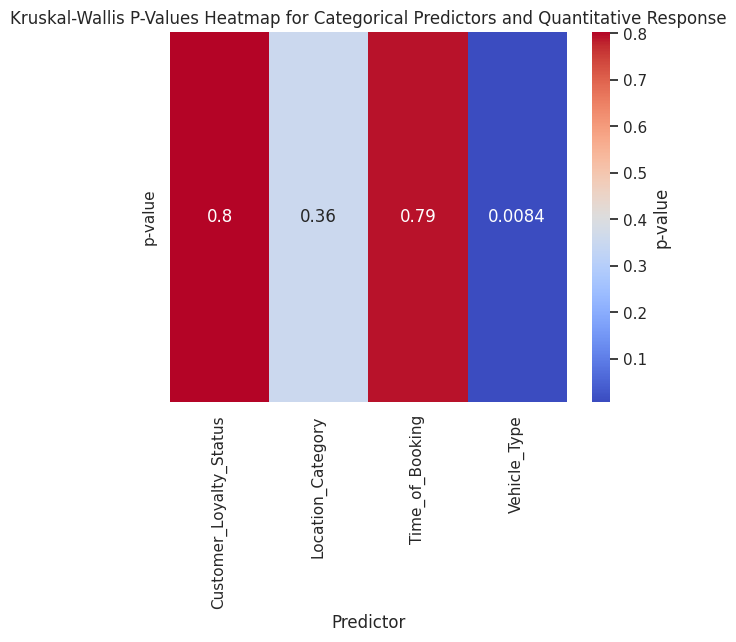

In [ ]:
#categorical predictors and response variable numerical relationship
from scipy.stats import kruskal

# Create a dictionary to store p-values
p_values_dict = {}

# Iterate through each categorical predictor
for predictor in df_cats.columns[:-1]:  # Exclude the response variable
    unique_categories = df_cats[predictor].unique()
    category_groups = [df_cats['adjusted_ride_cost'][df_cats[predictor] == category] for category in unique_categories]

    # Perform Kruskal-Wallis test
    h_statistic, p_value = kruskal(*category_groups)
    p_values_dict[predictor] = p_value

# Create a p-values dataframe
p_values_df = pd.DataFrame(list(p_values_dict.items()), columns=['Predictor', 'p-value'])
p_values_df
# Reshape the dataframe for heatmap
p_values_heatmap = p_values_df.pivot_table(index=None, columns='Predictor', values='p-value')

# Create a heatmap using seaborn
sns.heatmap(p_values_heatmap, annot=True, cmap='coolwarm', cbar_kws={'label': 'p-value'})
plt.title('Kruskal-Wallis P-Values Heatmap for Categorical Predictors and Quantitative Response')
#plt.show()

only p value of vehical tipe < 0.05, therefore only vehical type is related with adjusted cost

## Bivariate analysis for Profit percentage

In [ ]:
#dropping adjusted cost colomn
df_train=df_train_backup
df_train = df_train.drop(['adjusted_ride_cost'], axis=1)

In [ ]:
df_train.head(5)

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,profit_percentage
687,51,25,Rural,Regular,21,4.43,Evening,Premium,38,93.800000
500,21,9,Suburban,Gold,13,4.01,Evening,Economy,127,-2.222222
332,100,66,Suburban,Gold,27,3.53,Evening,Premium,106,-1.234568
979,79,29,Rural,Silver,29,4.22,Night,Economy,99,158.793103
817,27,8,Rural,Gold,48,4.18,Afternoon,Economy,167,10.000000


In [ ]:
# Identify profitable rides where profit percentage is positive
profitable_rides = df_train[df_train['profit_percentage'] > 0]

# Identify loss rides where profit percentage is negative
loss_rides = df_train[df_train['profit_percentage'] < 0]


import plotly.graph_objects as go

# Calculate the count of profitable and loss rides
profitable_count = len(profitable_rides)
loss_count = len(loss_rides)

# Create a donut chart to show the distribution of profitable and loss rides
labels = ['Profitable Rides', 'Loss Rides']
values = [profitable_count, loss_count]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.4)])
fig.update_layout(title='Profitability of Rides (Dynamic Pricing vs. Historical Pricing)')
fig.show()

By changing the static pricing to dynamic pricing the company get 83.2% of profitable rides and 16.8% of loss rides

In [ ]:
#Expected ride duration vs adjusted cost
fig = px.scatter(df_train, x='Number_of_Drivers',
                 y='profit_percentage',
                 title='Number_of_Drivers vs. profit_percentage',
                 width=600, height=500)
fig.show()

In [ ]:
#Expected ride duration vs adjusted cost
fig = px.scatter(df_train, x='Number_of_Riders',
                 y='profit_percentage',
                 title='Number_of_Riders vs. profit_percentage',
                 width=600, height=500)
fig.show()

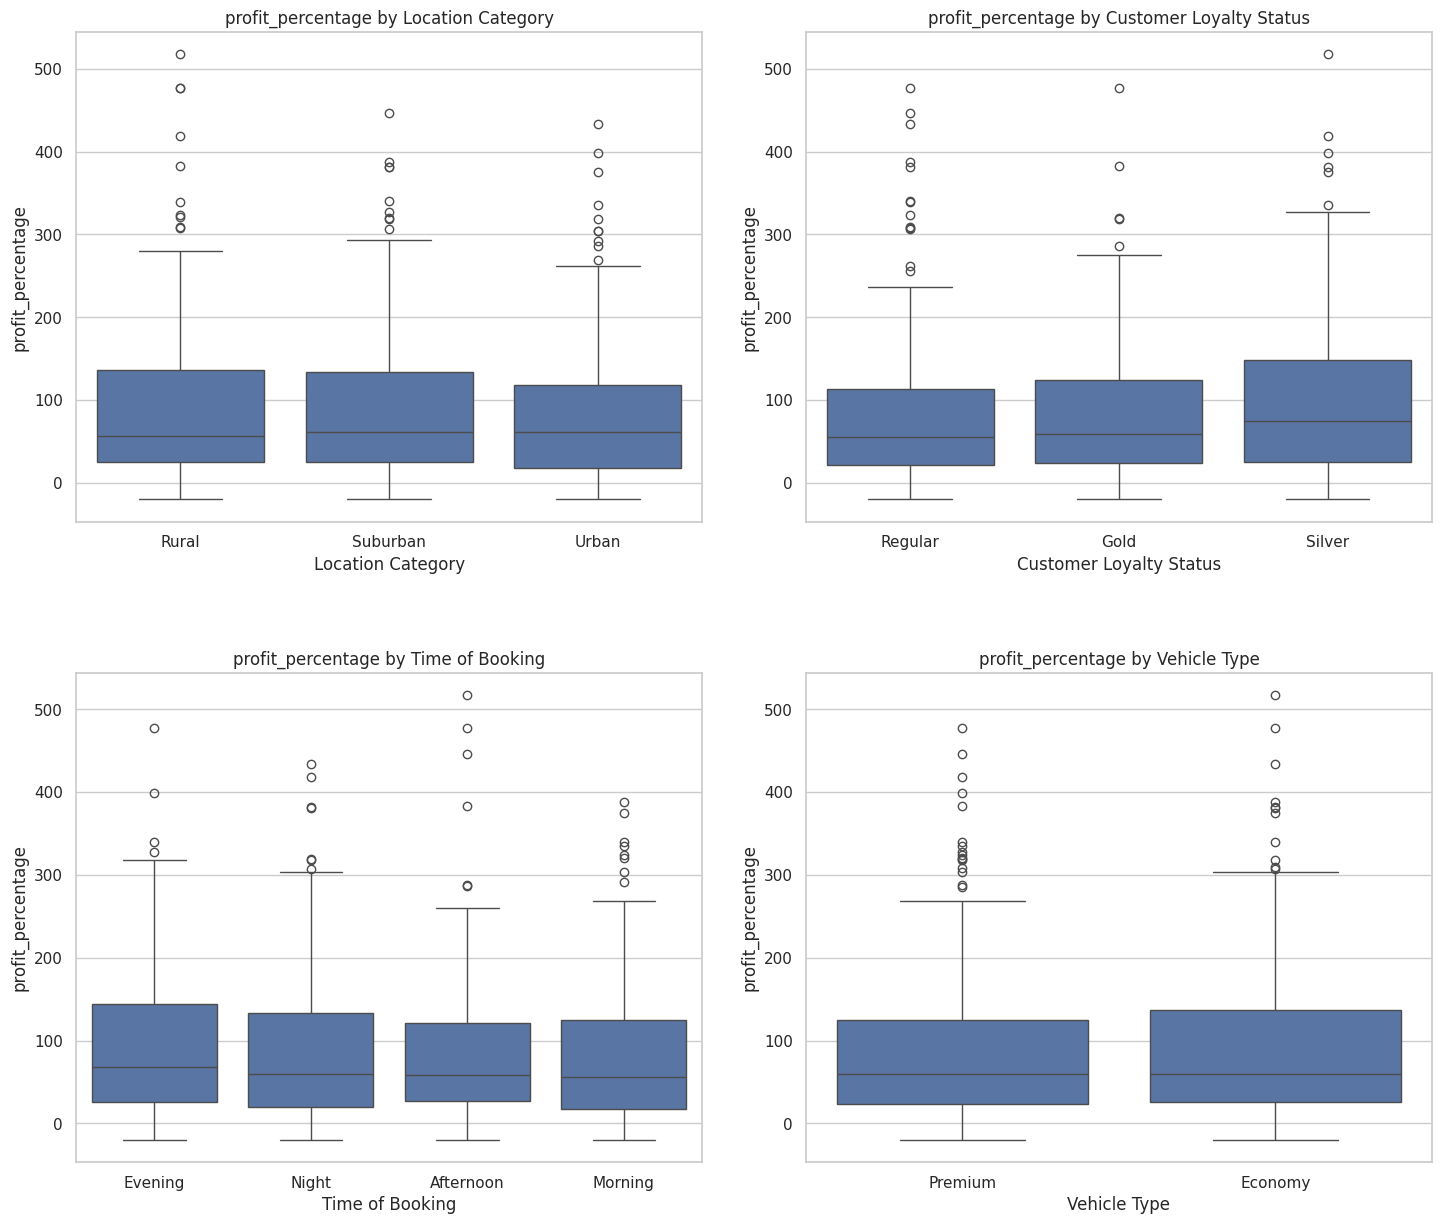

In [ ]:
#checking categorical bivariate plots

fig,axes = plt.subplots(nrows=2, ncols=2,figsize=(12,8))

for i, ax in enumerate(axes.ravel()):
  # if i <= 2:
    sns.boxplot(data=df_train, x=cats[i], y='profit_percentage', ax=ax)
    ax.set_title(f"profit_percentage by {title(cats[i])}")
    ax.set_xlabel(title(cats[i]))
    ax.set_ylabel("profit_percentage")

fig.tight_layout()
plt.subplots_adjust(top=1.5,right=1.2)
plt.show()

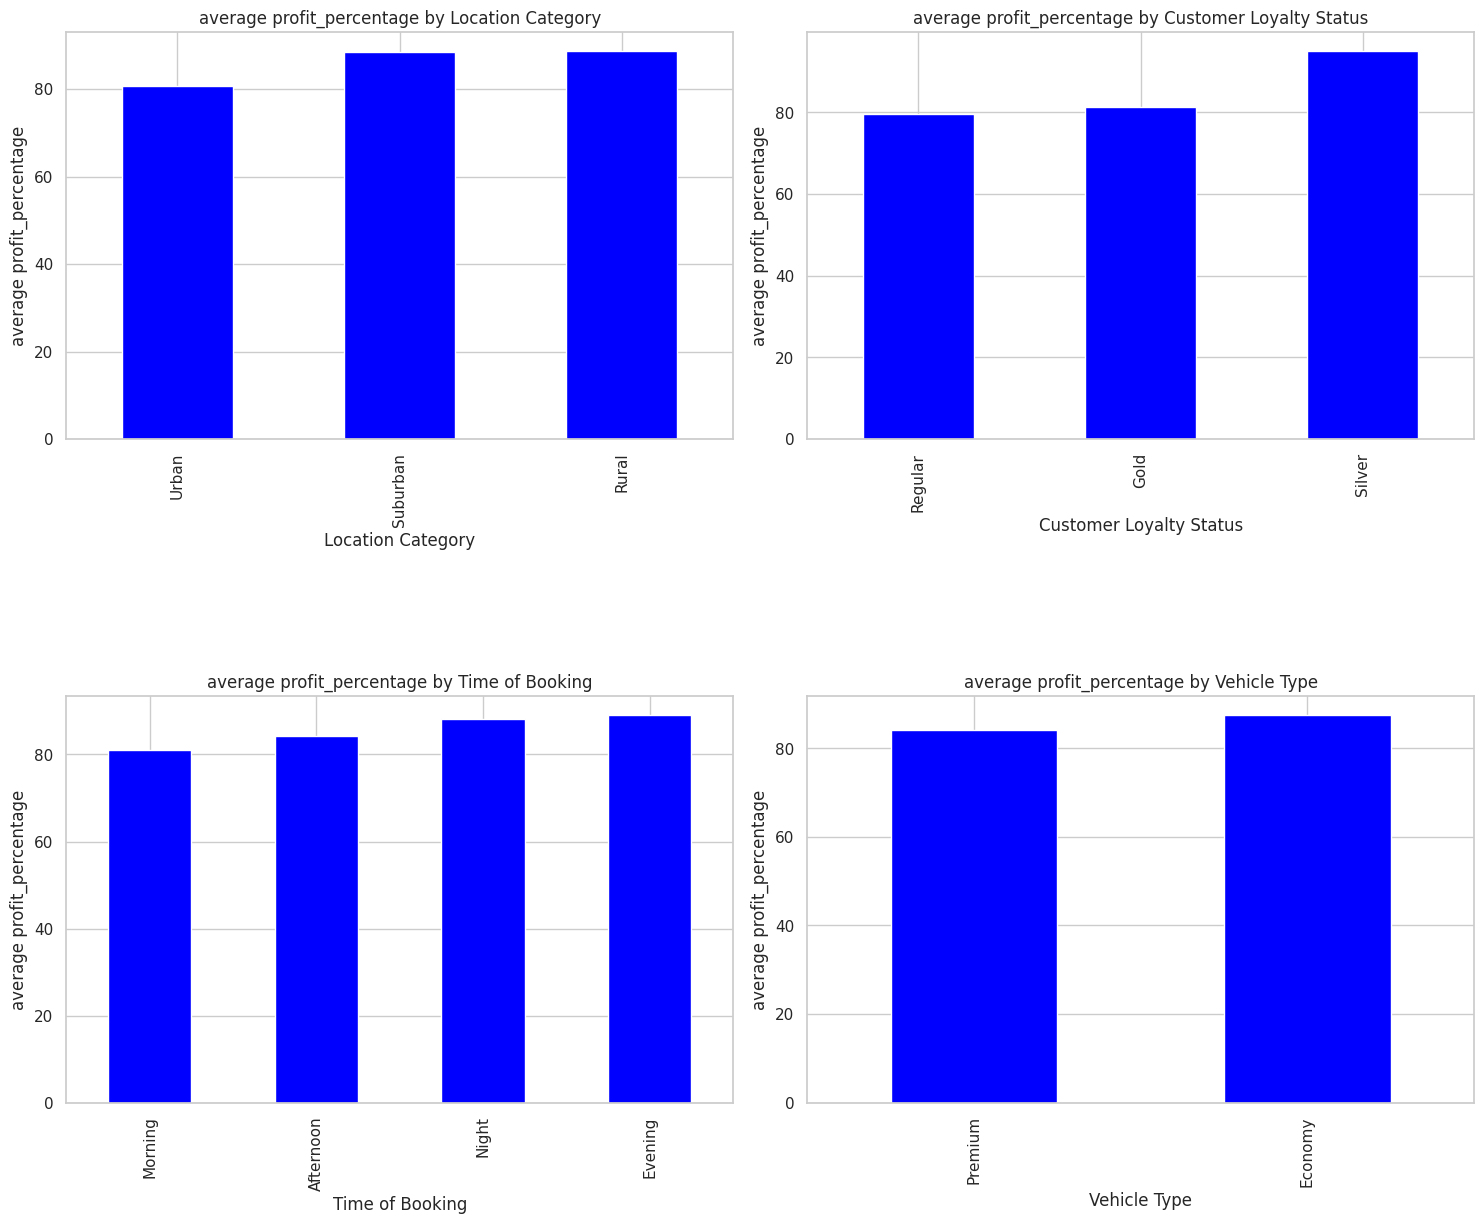

In [ ]:
#average ajusted cost for each ricategorical variables

fig,axes = plt.subplots(nrows=2, ncols=2,figsize=(15,8))

for i, ax in enumerate(axes.ravel()):

    df_train.groupby([cats[i]])['profit_percentage'].mean().nsmallest(df_train[cats[i]].nunique()).plot.bar(ax=ax, color='blue')

    ax.set_title(f"average profit_percentage by {title(cats[i])}")
    ax.set_xlabel(title(cats[i]))
    ax.set_ylabel("average profit_percentage")

fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()

**Getting numerical realtionship between predictors and response profit percentage**

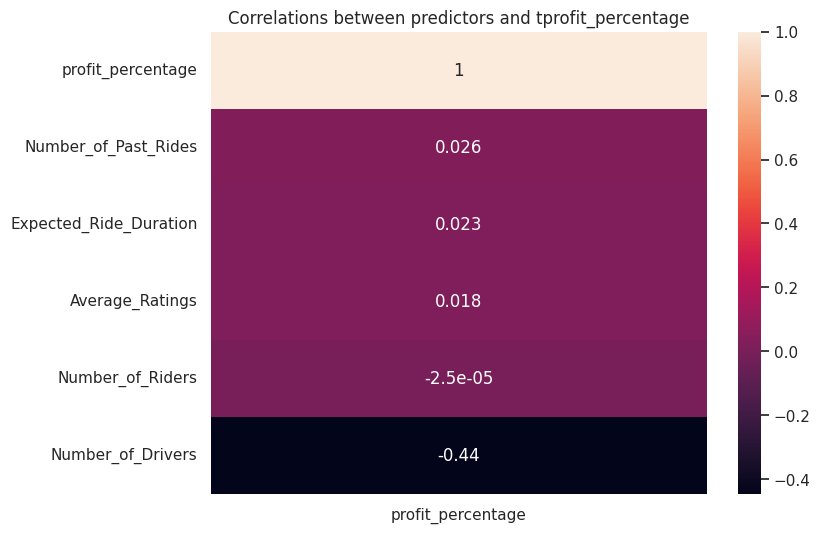

In [ ]:
#nemerical predictors and responses
df_quants=df_train.drop(cats,axis=1)
#highlighting correlations specifically with target
corr = df_quants.corr()
target_col=corr[['profit_percentage']].sort_values(by='profit_percentage', ascending=False)

plt.figure(figsize=(8,6))

sns.heatmap(target_col,annot=True)
plt.title("Correlations between predictors and tprofit_percentage")
plt.show()

Most of predictors are not linearly related but number of ddrivers is negetively related

In [ ]:
#categorical predictors and responses
df_cats=df_train.drop(quants[0:5],axis=1)
df_cats.head(5)

,Location_Category,Customer_Loyalty_Status,Time_of_Booking,Vehicle_Type,profit_percentage
687,Rural,Regular,Evening,Premium,93.800000
500,Suburban,Gold,Evening,Economy,-2.222222
332,Suburban,Gold,Evening,Premium,-1.234568
979,Rural,Silver,Night,Economy,158.793103
817,Rural,Gold,Afternoon,Economy,10.000000


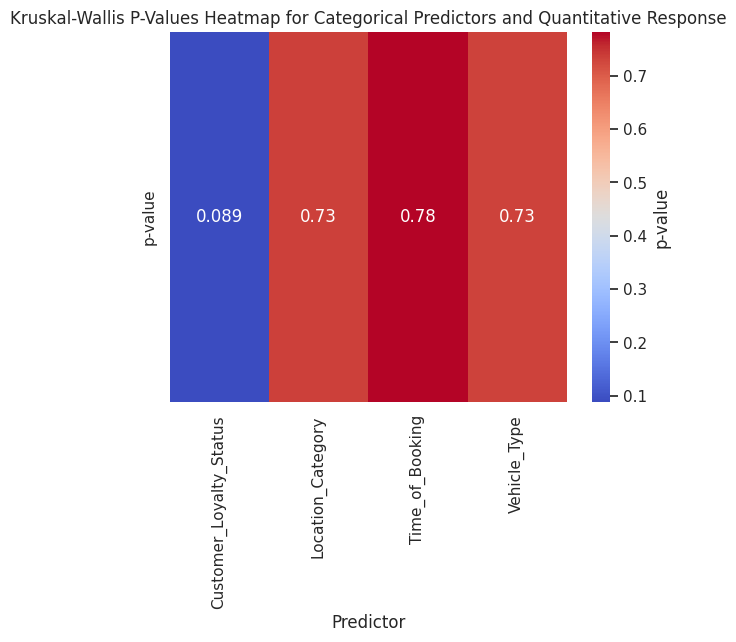

In [ ]:
#categorical predictors and response variable numerical relationship
from scipy.stats import kruskal

# Create a dictionary to store p-values
p_values_dict = {}

# Iterate through each categorical predictor
for predictor in df_cats.columns[:-1]:  # Exclude the response variable
    unique_categories = df_cats[predictor].unique()
    category_groups = [df_cats['profit_percentage'][df_cats[predictor] == category] for category in unique_categories]

    # Perform Kruskal-Wallis test
    h_statistic, p_value = kruskal(*category_groups)
    p_values_dict[predictor] = p_value

# Create a p-values dataframe
p_values_df = pd.DataFrame(list(p_values_dict.items()), columns=['Predictor', 'p-value'])
# Reshape the dataframe for heatmap
p_values_heatmap = p_values_df.pivot_table(index=None, columns='Predictor', values='p-value')

# Create a heatmap using seaborn
sns.heatmap(p_values_heatmap, annot=True, cmap='coolwarm', cbar_kws={'label': 'p-value'})
plt.title('Kruskal-Wallis P-Values Heatmap for Categorical Predictors and Quantitative Response')
plt.show()

Almost all categorical predictors are not relted with reponse profit percentage, but cutomer loyalty status is somewhat related

# Principal Component Analysis

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_norm=scaler.fit_transform(df11)
df_norm=pd.DataFrame(df_norm)
df_norm.describe()

,0,1,2,3,4,5,6,7,8
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.0
mean,1.421085e-17,-2.842171e-17,3.552714e-17,-5.306866e-16,1.136868e-16,-1.669775e-16,-7.105427e-18,-8.789414e-15,0.0
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,0.0
min,-1.704204e+00,-1.158309e+00,-1.707594e+00,-1.738486e+00,-1.823086e+00,-1.345005e+00,-1.177119e+00,-1.865823e+00,0.0
25%,-8.599535e-01,-8.434944e-01,-8.543262e-01,-8.890104e-01,-8.106899e-01,-7.059022e-01,-6.898399e-01,-8.641851e-01,0.0
50%,-1.570306e-02,-2.663335e-01,3.307267e-02,2.934134e-02,4.908339e-02,-2.014055e-01,-2.847412e-01,-4.213223e-02,0.0
75%,8.707599e-01,5.731733e-01,8.522101e-01,8.615976e-01,8.834196e-01,4.322234e-01,4.694181e-01,8.664312e-01,0.0
max,1.672798e+00,3.249101e+00,1.705478e+00,1.705333e+00,1.636357e+00,5.474590e+00,4.924476e+00,1.925983e+00,0.0


   Principal Component  Proportion of Variation Explained
0                    1                           0.271775
1                    2                           0.521175
2                    3                           0.709506
3                    4                           0.834907
4                    5                           0.957442
5                    6                           0.989608
6                    7                           0.999998
7                    8                           1.000000
8                    9                           1.000000


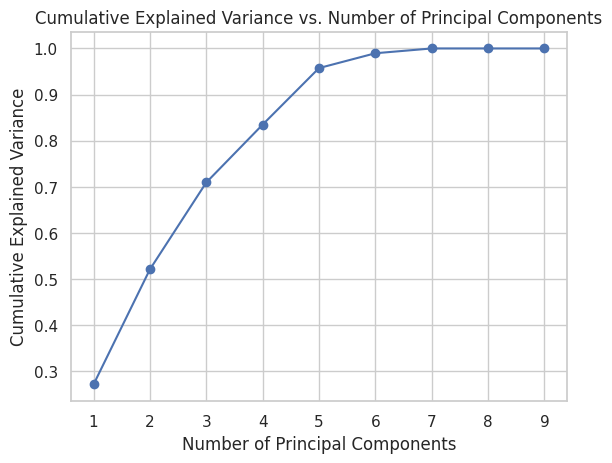

In [ ]:
from sklearn.decomposition import PCA
pca=PCA()
main_pca=pca.fit_transform(df_norm)

df_pca=pd.DataFrame(main_pca)

# Variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative variance explained
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
cumulative_variance_ratio
cvr_df=pd.DataFrame({"Principal Component":range(1,len(cumulative_variance_ratio)+1),"Proportion of Variation Explained":cumulative_variance_ratio})
print(cvr_df)

# Plotting the explained variance
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.show()

# Clustering Data

Given that the data contains mixed data we will be considering a mixed

In [ ]:
#Categorical Data must be Onehot encoded before applying Gower Distance
df_cluster=pd.get_dummies(df,columns=cats)
df_cluster.head()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,adjusted_ride_cost,profit_percentage,Location_Category_Rural,Location_Category_Suburban,Location_Category_Urban,Customer_Loyalty_Status_Gold,Customer_Loyalty_Status_Regular,Customer_Loyalty_Status_Silver,Time_of_Booking_Afternoon,Time_of_Booking_Evening,Time_of_Booking_Morning,Time_of_Booking_Night,Vehicle_Type_Economy,Vehicle_Type_Premium
0,90,45,13,4.47,90,266.710528,-6.172840,False,False,True,False,False,True,False,False,False,True,False,True
1,58,39,72,4.06,43,245.653817,41.282051,False,True,False,False,False,True,False,True,False,False,True,False
2,42,31,0,3.99,76,424.478684,28.709677,True,False,False,False,False,True,True,False,False,False,False,True
3,89,28,67,4.31,134,701.155452,49.118166,True,False,False,False,True,False,True,False,False,False,False,True
4,78,22,74,3.77,149,1952.472427,236.818182,True,False,False,False,True,False,True,False,False,False,True,False


In [ ]:
!pip install gower

In [ ]:
#We use the gower distance using the gower library
import gower
dist_matrix=gower.gower_matrix(df_cluster)

In [ ]:
pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.0 MB/s eta 0:00:00


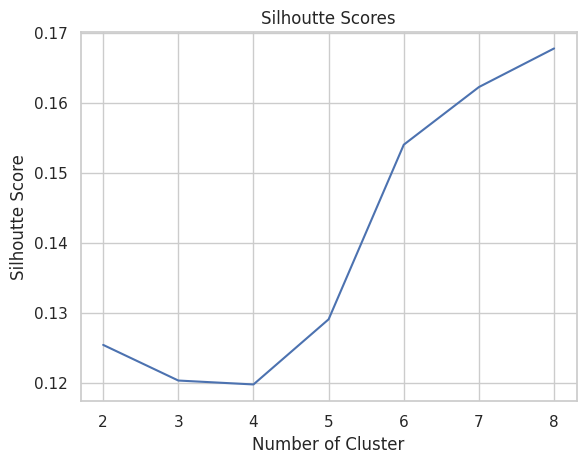

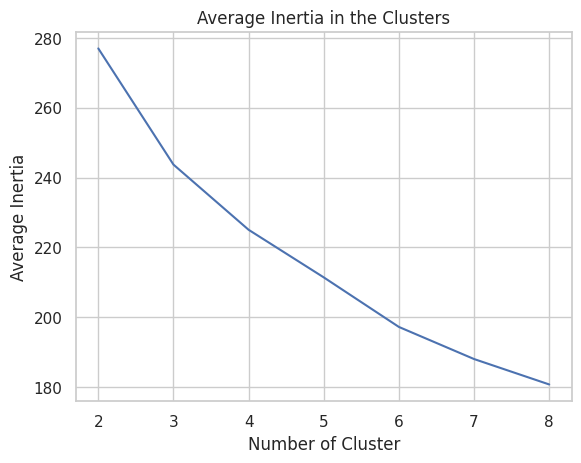

In [ ]:
#From a geometric stand point one should not compute Euclidean distances from the resultant Gower matrices
#Therefore, this method cannot be combined with the Kmeans algorithm. Instead the KMedoids algorithm provided by the “sklearn_extra” package
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score


min_clusters=2
max_clusters=9
sil_score=[]
SSE=[]
for i in range(min_clusters-1,max_clusters-1):
  kmedioids = KMedoids(n_clusters=i+1,metric='precomputed',method='pam',init='build',max_iter=300,random_state=100).fit(dist_matrix)
  clusters = kmedioids.labels_
  sil_score.append(silhouette_score(dist_matrix, clusters, metric='precomputed'))
  SSE.append(kmedioids.inertia_)


sns.lineplot(x=range(min_clusters,max_clusters),y=sil_score)
plt.title("Silhoutte Scores")
plt.xlabel("Number of Cluster")
plt.ylabel("Silhoutte Score")
plt.show()
sns.lineplot(x=range(min_clusters,max_clusters),y=SSE)
plt.title("Average Inertia in the Clusters")
plt.xlabel("Number of Cluster")
plt.ylabel("Average Inertia")
plt.show()

Analysing the above we can conclude that there are no clusters present. This is justified by,


*   The silhoutte scores being less than 0.5 and then increasing rapidly
*   The elbow plow indicates that the inertia does not flatten out and goes



## Checking for Initially Important Features

In [ ]:
main_df=df_train
main_df=main_df.drop('profit_percentage',axis=1)
for cat in cats:
  main_df[cat],uniques=pd.factorize(main_df[cat])

In [ ]:
#Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
# define the model
model = RandomForestRegressor()
model.fit(main_df, y_train)
importance = model.feature_importances_

# summarize feature importance
Importance_Score=[]
Ft=[]
for i,v in enumerate(importance):
  Ft.append(i)
  Importance_Score.append(v)

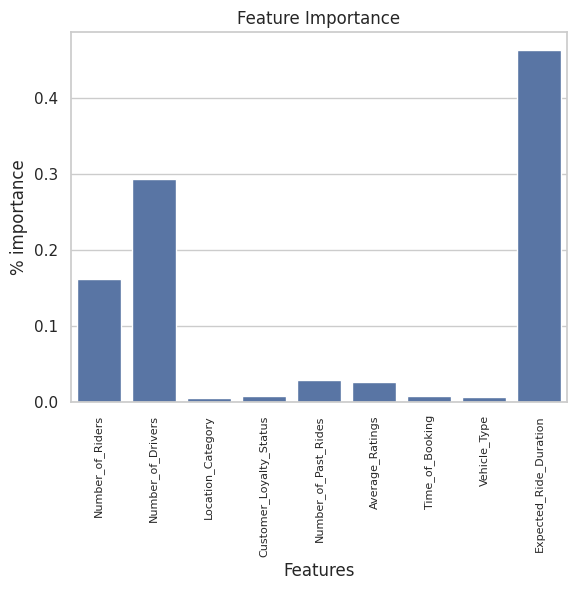

In [ ]:
sns.barplot(x=main_df.columns,y=Importance_Score)
plt.xticks(rotation='vertical',fontsize=8)
plt.xlabel('Features')
plt.ylabel('% importance')
plt.title('Feature Importance')
plt.show()

## PLSR

In [ ]:
main_df

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration
687,51,25,0,0,21,4.43,0,0,38
500,21,9,1,1,13,4.01,0,1,127
332,100,66,1,1,27,3.53,0,0,106
979,79,29,0,2,29,4.22,1,1,99
817,27,8,0,1,48,4.18,2,1,167
...,...,...,...,...,...,...,...,...,...
835,35,21,1,2,13,4.14,3,0,36
192,65,10,2,0,77,4.36,2,1,170
629,57,40,2,0,78,3.62,2,1,171
559,75,56,2,0,66,3.69,0,0,22


In [ ]:
quants.remove("adjusted_ride_cost")
quants.remove("profit_percentage")

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
df_wo_cat=df_train[quants]
df_wo_cat['adjusted_ride_cost']=y_train
x_val = StandardScaler().fit_transform(df_wo_cat.values)
x_vals=x_val[:,0:5]
y=np.array(x_val[:,5])
plsr = PLSRegression(n_components=2, scale=False)
plsr.fit(x_vals, y)
scores = pd.DataFrame(plsr.x_scores_,columns = ['PC1', 'PC2'])
scores.index = df_train.index
x_loadings = plsr.x_loadings_
y_loadings = plsr.y_loadings_
x_vals.shape


<ipython-input-86-01849a575e60>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(800, 5)

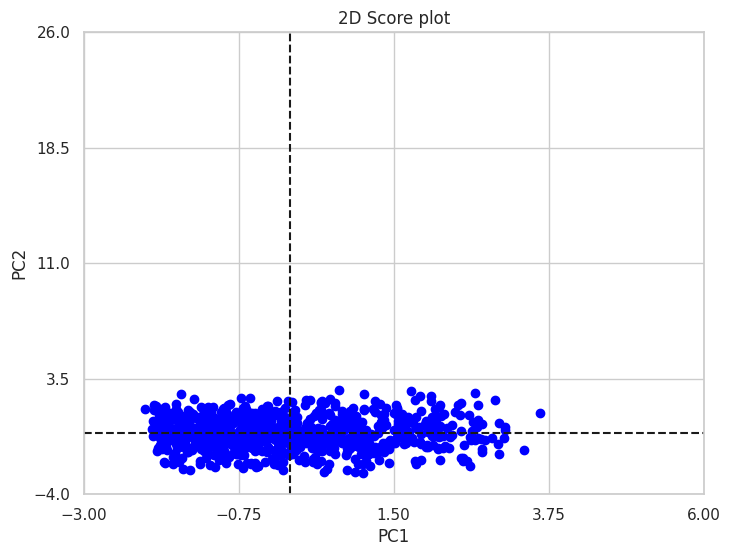

In [ ]:
pca = PCA(n_components=2)
components = pca.fit_transform(x_vals)
com=components[components[:,1]<6]

#score plot to identify clusters
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(components[:,0] ,components[:,1], marker='o', color='blue')

scores11=pd.DataFrame({'PC1': com[:,0], 'PC2': com[:,1]})
scores12=pd.DataFrame({'PC1': components[:,0], 'PC2': components[:,1]})
# Define the axes
xticks = np.linspace(-3, 6, num=5)
yticks = np.linspace(-4,26, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
ax.axhline(y=0, color='k',linestyle='--')
ax.axvline(x=0, color='k',linestyle='--')

# Show plot
plt.title('2D Score plot')
plt.show()

In [ ]:
df_wo_cat.head()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,adjusted_ride_cost
687,51,25,21,4.43,38,388.100506
500,21,9,13,4.01,127,421.668229
332,100,66,27,3.53,106,407.166031
979,79,29,29,4.22,99,788.656916
817,27,8,48,4.18,167,544.741756


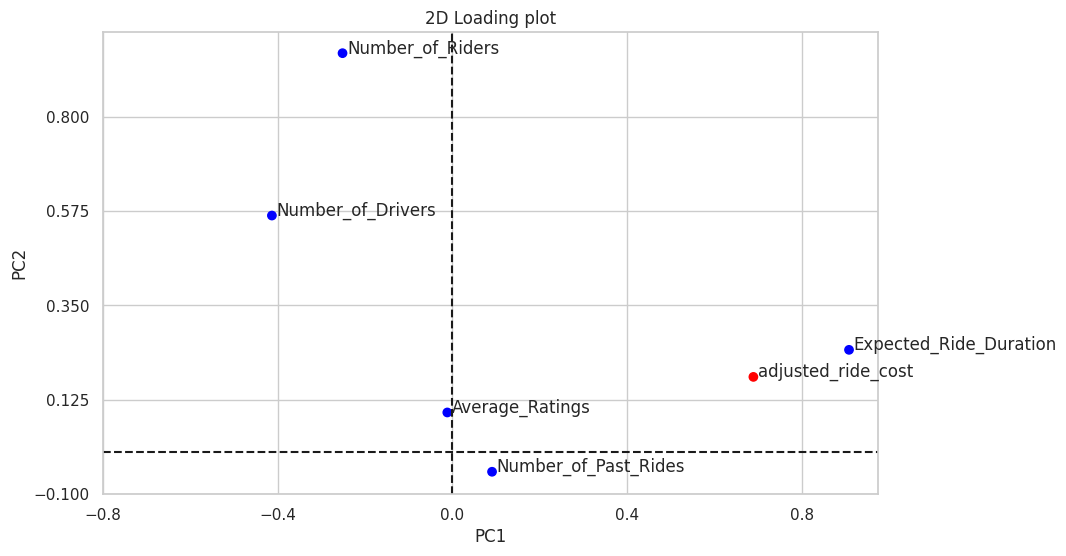

In [ ]:
#data frame with loadings
dfx=pd.DataFrame(x_loadings,columns = ['PC1', 'PC2'])
dfy=pd.DataFrame(y_loadings,columns = ['PC1', 'PC2'])

loadings = pd.concat([dfx,dfy])
loadings
df2 = loadings.assign(attributes=df_wo_cat.columns)
df2.attributes


fig, ax = plt.subplots(figsize=(10, 6))
colors = ['blue',  'blue', 'blue','blue', 'blue','red']
ax.scatter(df2.PC1, df2.PC2, marker='o', color=colors)


for i, txt in enumerate(df2.attributes):
   ax.annotate(txt, (df2.PC1.iat[i]+0.01, df2.PC2.iat[i]))

# Define the axes
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.1, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
ax.axhline(y=0, color='k',linestyle='--')
ax.axvline(x=0, color='k',linestyle='--')


# Show plot
plt.title('2D Loading plot')
plt.show()

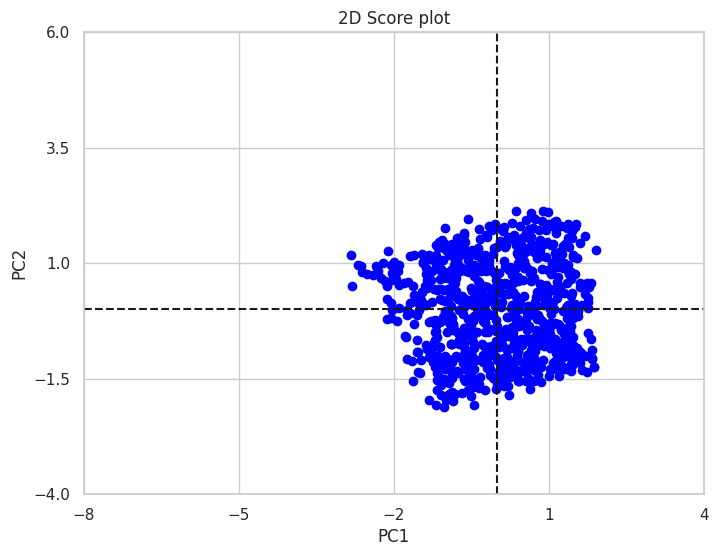

In [ ]:
#score plot to identify clusters
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(scores.PC1, scores.PC2, marker='o', color='blue')

# Define the axes
xticks = np.linspace(-8, 4, num=5)
yticks = np.linspace(-4,6, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
ax.axhline(y=0, color='k',linestyle='--')
ax.axvline(x=0, color='k',linestyle='--')

# Show plot
plt.title('2D Score plot')
plt.show()

## Dividing the training data set into the two releven datasets


In [ ]:
df_wo_profit_percentage=df_train.drop('profit_percentage',axis=1)


## Dataset Saving for Modelling

In [ ]:
#dataset for objective 1 - for adujsted cost
df_1=df.drop('profit_percentage',axis=1)
df_1.head(5)


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,adjusted_ride_cost
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,266.710528
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,245.653817
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,424.478684
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,701.155452
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,1952.472427


In [ ]:
#dataset for objective 2 - for profit percentage
df_2=df.drop('adjusted_ride_cost',axis=1)
df_2.head(5)


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,profit_percentage
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,-6.172840
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,41.282051
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,28.709677
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,49.118166
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,236.818182


In [ ]:
#saving csv files
#df_1.to_csv('/content/drive/My Drive/Colab Notebooks/FINAL PROJECT/df_1.csv')
#df_2.to_csv('/content/drive/My Drive/Colab Notebooks/FINAL PROJECT/df_2.csv')